<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout6_SimpleLinearRegression_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #6 - Part A : Simple Linear Regression - Model Summaries


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 6.1

Consider data on the home prices of homes in La Crosse and Winona.  This data was collected using Redfin website. 
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: PRICE ($) </li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>SQUAREFEET, the size of the home (ft^2)</li>
          <li>BEDS, number of bedrooms in home</li>
          <li>BATHS, number of bathrooms in home</li>
          <li>LOTSIZE, the size of the lot (ft^2)</li>
          <li>YEARBUILT, the year in which the home was built</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1KiZ5CvmWwvDg4HSPX7FwRsQTUMtvv0gG" width='50%' height='50%'></img></p>

  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)

Redfin Data: <a href="https://www.redfin.com/city/10404/WI/La-Crosse">La Crosse WI</a> | <a href="https://www.redfin.com/city/18151/MN/Winona">Winona MN</a></li>

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [21]:
#load tidyverse package
library(tidyverse)

The **read_csv()** function is used to read in the dataset. 

In [24]:
# Reading data in using read.csv via Base 
LaCrosseWinonaHomePrices <- read_csv("http://www.StatsClass.org/stat360/Datasets/LaCrosse_Winona_Redfin.csv")

Rows: 67 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): SALETYPE, PROPERTYTYPE, ADDRESS, CITY, STATE, LOCATION, STATUS, NE...
dbl (13): ZIPCODE, PRICE, BEDS, BATHS, SQUAREFEET, LOTSIZE, YEARBUILT, DAYSO...
lgl  (1): SOLDDATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The **head()** function can be used to see the first few lines of the dataset.

In [25]:
#Look at data
head(LaCrosseWinonaHomePrices)

SALETYPE,SOLDDATE,PROPERTYTYPE,ADDRESS,CITY,STATE,ZIPCODE,PRICE,BEDS,BATHS,⋯,STATUS,NEXTOPENHOUSESTARTTIME,NEXTOPENHOUSEENDTIME,URL,SOURCE,MLSNumber,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
MLS Listing,NA,Single Family Residential,2504 Prospect St,La Crosse,WI,54603,224900,3,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/2504-Prospect-St-54603/home/57710601,METROMLS,1811675,N,Y,43.85815,-91.23536
MLS Listing,NA,Single Family Residential,2205 Johnson St,La Crosse,WI,54601,219900,2,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/2205-Johnson-St-54601/home/57970153,METROMLS,1811671,N,Y,43.80073,-91.22238
MLS Listing,NA,Single Family Residential,40633 Lamoille Dr,Winona,MN,55987,294900,3,2.0,⋯,Pre On-Market,NA,NA,https://www.redfin.com/MN/Winona/40633-Lamoille-Dr-55987/home/55910942,NORTHSTARMLS,6260624,N,Y,44.00056,-91.46975
MLS Listing,NA,Single Family Residential,730 Harvey St,La Crosse,WI,54603,339000,3,2.5,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/730-Harvey-St-54603/home/58008728,METROMLS,1811603,N,Y,43.83566,-91.23375
MLS Listing,NA,Single Family Residential,515 Losey Blvd N,La Crosse,WI,54601,379900,3,3.5,⋯,Active,September-25-2022 01:00 PM,September-25-2022 02:30 PM,https://www.redfin.com/WI/La-Crosse/515-Losey-Blvd-N-54601/home/89277469,METROMLS,1811572,N,Y,43.81707,-91.21970
MLS Listing,NA,Single Family Residential,3355 Peace St,La Crosse,WI,54601,274900,3,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/3355-Peace-St-54601/home/89290885,METROMLS,1811563,N,Y,43.76875,-91.20766


## Model Setup

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: PRICE</li>
  <li><strong>Independent / Predictor Variable</strong>: SQUAREFEET</li>
  <li><i>Assume</i> the following structure for the <strong>mean</strong> and <strong>variance</strong> functions</li>
  </ul>

<ul><ul>
  <li>$E(Price | SquareFeet) = \beta_{0} + \beta_{1} * SquareFeet$</li>
  <li>$Var(Price | SquareFeet) = \sigma^{2}$</li>
</ul></ul>

<u>Comments</u>

The mean function specified above is called a <strong>simple linear regression model</strong>, often denoted <strong>SLR</strong>: 
<ul>
<li><strong>Simple</strong> implies a single predictor variable, i.e. SquareFeet</li>
<li><strong>Linear</strong> implies the mean function is linear in its <i>parameters</i></li>

[Math Stuff]: If a function is linear, then this implies the partial derivative with respect to any parameter is free of all other parameters.

For example, the following mean function is considered a linear model even though it is not a straigt line. 

$$
E(Y|X) = \beta_{0} + \beta_{1}*X + \beta_{2}*{X^2} 
$$
  <ul>
    <li>$\frac{\partial}{\partial \beta_{0}} E(Y|X) = 1$, which is free of all other parameters
    <li>$\frac{\partial}{\partial \beta_{1}} E(Y|X) = X$, which is free of all other parameters
    <li>$\frac{\partial}{\partial \beta_{2}} E(Y|X) = X^2$, which is free of all other parameters
  </ul>

However, the following mean functino is <strong>not</strong> considered a linear model.

$$
E(Y|X) = \beta_{0} + \frac{1}{\beta_{1}}*X 
$$
<ul>
    <li>$\frac{\partial}{\partial \beta_{0}} E(Y|X) = 1$, which is free of all other parameters
    <li>$\frac{\partial}{\partial \beta_{1}} E(Y|X) = -\frac{1}{\beta_{1}^2}X$, which is <strong>not</strong> free of all other parameters
</ul>
</ul>


## Scatterplot

Typically, the first step in doing a simple linear regression analysis is to create a scatterplot of the two variables.  The response variables goes on the y-axis and the independent / predictor variable goes on the x-axis.

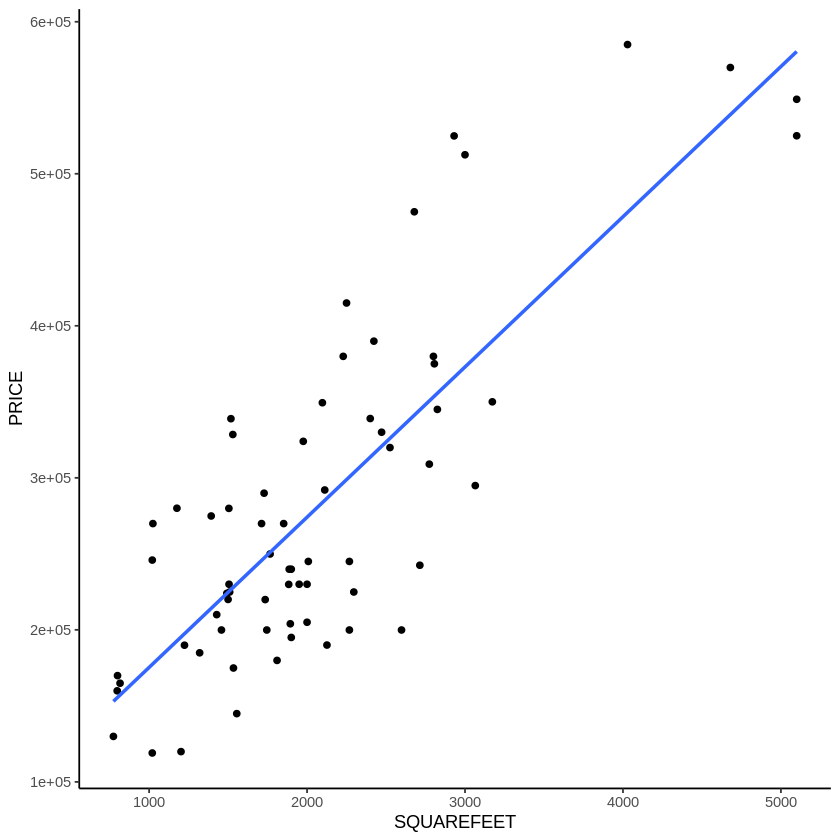

In [26]:
#Scatterplot with simple linear regression line
ggplot(data=LaCrosseWinonaHomePrices, aes(x=SQUAREFEET,y=PRICE)) + 
  geom_point() +    #adding the points to the plot
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +  #adding a regression line to the plot without the standard error bands 
  theme_classic()

## Fitting the Model

The <strong>lm()</strong> function will be used to fit a linear model in R.  

$$lm(Response \sim Predictor, data = \mbox{____} )$$

Consider the following suggested guidelines when fitting a model in R.


*  A model *object* is created when fitting a model; Use an informative name for the model object.  The following is a suggested naming convention for a SLR model.

$$\mbox{LM_Response_Predictor} ← lm(Response \sim Predictor, data = \mbox{____} )$$

*  The model form for a SLR model is specified as $Response \sim Predictor$

* The data frame used for fitting the model is specified using $data = $  

Consider the following code that will fit a simple linear regression model in R. 

In [35]:
#Fitting the simple linear regression model in R
LM_Price_SquareFeet <- lm(PRICE ~ SQUAREFEET, data = LaCrosseWinonaHomePrices)

 The model object contains a lot of information regarding the fit.  However, an extensive set of helper functions (e.g. summary(), predict(), anova(), etc) are needed to retrieve this large collection of output.

In [38]:
# Minimal information is provided for a model object
LM_Price_SquareFeet


Call:
lm(formula = PRICE ~ SQUAREFEET, data = LaCrosseWinonaHomePrices)

Coefficients:
(Intercept)   SQUAREFEET  
   76499.68        98.81  


Next, consider the use ofthe summary() function to retrieve several summaries regarding the SLR model. 

In [39]:
# Using the summary() helper function to get additional information 
# on the model object
summary(LM_Price_SquareFeet)


Call:
lm(formula = PRICE ~ SQUAREFEET, data = LaCrosseWinonaHomePrices)

Residuals:
    Min      1Q  Median      3Q     Max 
-133303  -46568   -6090   36819  158794 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 76499.678  20259.923   3.776 0.000348 ***
SQUAREFEET     98.808      8.981  11.002  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66180 on 65 degrees of freedom
Multiple R-squared:  0.6506,	Adjusted R-squared:  0.6453 
F-statistic:   121 on 1 and 65 DF,  p-value: < 2.2e-16


## Model Summaries

*   The estimated simple linear regression model is
$$ \begin{array}{rcl}
\widehat{E}(Price|Square Feet) & = & \hat{\beta}_{0} + \hat{\beta}_{1} * Square Feet\\
 & = & $76,499.69 + $98.81 * SquareFeet\\ 
\end{array} 
$$

*   The $R^2$ value is

$$\begin{array}{rcl}
R^2 &  = & 0.6506 \\
& \approx & 65.1 \% \\
\end{array}
$$

*   The $\mbox{Root Mean Square Error}$, often denoted as $RMSE$ or $\hat{\sigma}$, is 66180 and this quantity is based on $67-2 = 65$ degrees of freedom.

$$\begin{array}{rcl}
RMSE & = & \sqrt{\frac{\sum{(Data Point \space - Mean)^2}}{\mbox{n - # parameters}}} \\
& = & \sqrt{\frac{\sum{(Data Point \space - Mean)^2}}{\mbox{n - 2}}} \\
 & = & $66,180 \\
\end{array}
$$

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

1.   Provide an interpretation for the meaning of $\hat{\beta}_{1}$

2.   Provide an interpretation for the meaning of $\hat{\beta}_{0}$

3.   Provide an interpretation of $R^2$

4.   Provide an interpretation of $RMSE$

<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

<table width='100%'><tr><td bgcolor="orange"><font color="white" size="+2">Aside</font></td></tr></table>

In addition to the helper functions, there are elements that are attached directly to model object. The names() helper function will identify these various elements.

In [40]:
names(LM_Price_SquareFeet)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

For example, to obtain the call that was used to build the simple linear regression model, add $call to the end of the object name.

In [47]:
#Getting the call of a model object
LM_Price_SquareFeet$call

lm(formula = PRICE ~ SQUAREFEET, data = LaCrosseWinonaHomePrices)

The estimated model coefficients can be obtained by adding $coefficients to the end of the object name.

In [56]:
#Getting the estimated model coefficients
cat("Getting the estimated model coefficients:\n\n")
LM_Price_SquareFeet$coefficients

#Getting the estimated model coefficients
cat("\n\n Getting just the estimated slope:\n\n")
LM_Price_SquareFeet$coefficients[2]


Getting the estimated model coefficients:



(Intercept)  SQUAREFEET 
76499.67833    98.80815



 Getting just the estimated slope:



SQUAREFEET 
  98.80815

<table width='100%'><tr><td bgcolor="orange"><font color="white" size="+2">&nbsp;</font></td></tr></table>

## Getting the Predicted Values

The <strong>predict()</strong> helper function can be used to compute the predicted values, i.e. the estimated price for each home.  Here, the predicted prices are being added to a new data.frame.

In [122]:
(LaCrosseWinonaHomePrices
 %>% mutate(
            Predicted_PRICE = predict(LM_Price_SquareFeet, newdata = LaCrosseWinonaHomePrices)
           )
 %>% select(ADDRESS, CITY, STATE, PRICE, Predicted_PRICE, BEDS, BATHS, SQUAREFEET, LOTSIZE, YEARBUILT, URL)
) -> LaCrosseWinonaHomePrices_with_Predicted

head(LaCrosseWinonaHomePrices_with_Predicted)


ADDRESS,CITY,STATE,PRICE,Predicted_PRICE,BEDS,BATHS,SQUAREFEET,LOTSIZE,YEARBUILT,URL
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2504 Prospect St,La Crosse,WI,224900,225700.0,3,2.0,1510,5662,1947,https://www.redfin.com/WI/La-Crosse/2504-Prospect-St-54603/home/57710601
2205 Johnson St,La Crosse,WI,219900,247931.8,2,2.0,1735,7405,1950,https://www.redfin.com/WI/La-Crosse/2205-Johnson-St-54601/home/57970153
40633 Lamoille Dr,Winona,MN,294900,379346.7,3,2.0,3065,130680,1988,https://www.redfin.com/MN/Winona/40633-Lamoille-Dr-55987/home/55910942
730 Harvey St,La Crosse,WI,339000,313639.2,3,2.5,2400,14810,1952,https://www.redfin.com/WI/La-Crosse/730-Harvey-St-54603/home/58008728
515 Losey Blvd N,La Crosse,WI,379900,296743.0,3,3.5,2229,8276,1941,https://www.redfin.com/WI/La-Crosse/515-Losey-Blvd-N-54601/home/89277469
3355 Peace St,La Crosse,WI,274900,214139.4,3,2.0,1393,9147,2004,https://www.redfin.com/WI/La-Crosse/3355-Peace-St-54601/home/89290885


One common plot that is used to investigate any adverse patterns in the predicted values is a scatterplot of $Actual$ vs. $Predicted$.  A $y = x$ reference line is typically added to this plot.  The $y = x$ line represents <strong>agreement</strong> between the $Actual$ and $Predicted$ values.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1eiS2AhsN_h1k2o7oVMPtsdUsCJ0LPaZT" width='50%' height='50%'></img></p>

Next, getting a scatterplot of $Actual$ vs $Predicted$ for LM_Price_SquareFeet model.

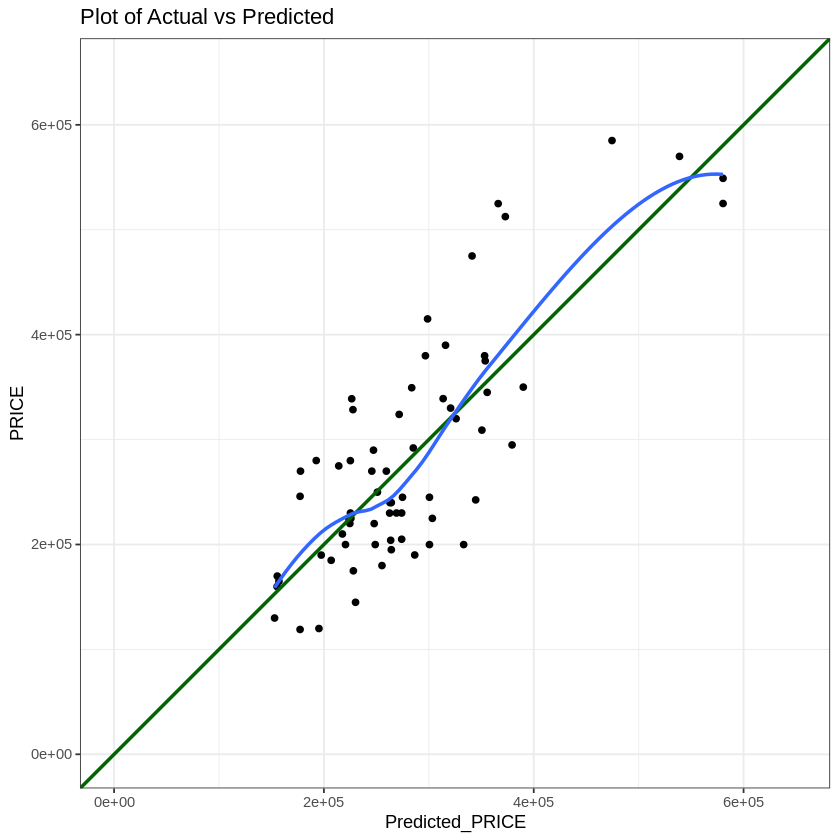

In [121]:
#Scatterplot with simple linear regression line
ggplot(data=LaCrosseWinonaHomePrices_with_Predicted, aes(x=Predicted_PRICE, y=PRICE)) + 
  geom_point() +    #adding the points to the plot
  geom_abline(intercept = 0, slope = 1, col="darkgreen", size=1) +   # adding a y=x reference line
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  #adding a loess smoother to identify patterns
  
  # Deal with scaling the plot appropriately
  coord_fixed(ratio = 1) +    # Force the plot to be square, i.e. aspect ratio = 1
  xlim(0,650000) +            # Set the limits on the x-axis (should match the y-axis)
  ylim(0,650000) +            # Set the limits on the y-axis (should match the x-axis)
  
  ggtitle("Plot of Actual vs Predicted") +   #Add a title to the plot
  
  theme_bw()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

5.   Does there appear to be any adverse patterns in this plot?  Discuss. 

6.   Redraw the plot above, but use color to identify the two different cities.  Does the model appear to fit well for both La Crosse and Winona?  Discuss.

<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

## Getting the Residuals

A second common plot that is used to investigate any adverse patterns in the predicted values is a scatterplot of $Residuals$ vs. $Predicted$.  In this plot, a $y = 0$ reference line is typically added to this plot.  The $y = 0$ line represents <strong>agreement</strong> between the $Actual$ and $Predicted$ values.

$$Residual = (Data \space Point - Mean)$$

Consider the following facts regarding a $Residual$

*   $Residual \approx 0 \Rightarrow \mbox{Data Point is close to it's mean}$
*   $Residaul < 0 \Rightarrow \mbox{The mean function} \space over-predicted \space \mbox{for this point}$
*   $Residaul > 0 \Rightarrow \mbox{The mean function} \space under-predicted \space \mbox{for this point}$

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1PLvclM8xIsm3H8nlAWKFS7Ck1VqanzAI" width='50%' height='50%'></img></p>

Next, the $Residual$ will be computed for each data point. Once, again the outcomes will be placed into a new data.frame.

In [123]:
(LaCrosseWinonaHomePrices_with_Predicted
 %>% mutate(
            Residual = (PRICE - Predicted_PRICE)
           )
 %>% select(ADDRESS, CITY, STATE, PRICE, Predicted_PRICE, Residual, BEDS, BATHS, SQUAREFEET, LOTSIZE, YEARBUILT, URL)
) -> LaCrosseWinonaHomePrices_with_Predicted_and_Residuals

head(LaCrosseWinonaHomePrices_with_Predicted_and_Residuals)

ADDRESS,CITY,STATE,PRICE,Predicted_PRICE,Residual,BEDS,BATHS,SQUAREFEET,LOTSIZE,YEARBUILT,URL
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2504 Prospect St,La Crosse,WI,224900,225700.0,-799.9853,3,2.0,1510,5662,1947,https://www.redfin.com/WI/La-Crosse/2504-Prospect-St-54603/home/57710601
2205 Johnson St,La Crosse,WI,219900,247931.8,-28031.8191,2,2.0,1735,7405,1950,https://www.redfin.com/WI/La-Crosse/2205-Johnson-St-54601/home/57970153
40633 Lamoille Dr,Winona,MN,294900,379346.7,-84446.6590,3,2.0,3065,130680,1988,https://www.redfin.com/MN/Winona/40633-Lamoille-Dr-55987/home/55910942
730 Harvey St,La Crosse,WI,339000,313639.2,25360.7609,3,2.5,2400,14810,1952,https://www.redfin.com/WI/La-Crosse/730-Harvey-St-54603/home/58008728
515 Losey Blvd N,La Crosse,WI,379900,296743.0,83156.9546,3,3.5,2229,8276,1941,https://www.redfin.com/WI/La-Crosse/515-Losey-Blvd-N-54601/home/89277469
3355 Peace St,La Crosse,WI,274900,214139.4,60760.5683,3,2.0,1393,9147,2004,https://www.redfin.com/WI/La-Crosse/3355-Peace-St-54601/home/89290885


Once $Residual$ values have been computed for each observation, these values can be used to create the $Residual$ vs $Predicted$ scatterplot.  A loess smoother has been added to this plot to help identify possible patterns in this plot.

<u>Comment</u>:  It is common to rescale the y-axis to be symmetric in this plot.  This can be done using the ylim() function when creating your plot.

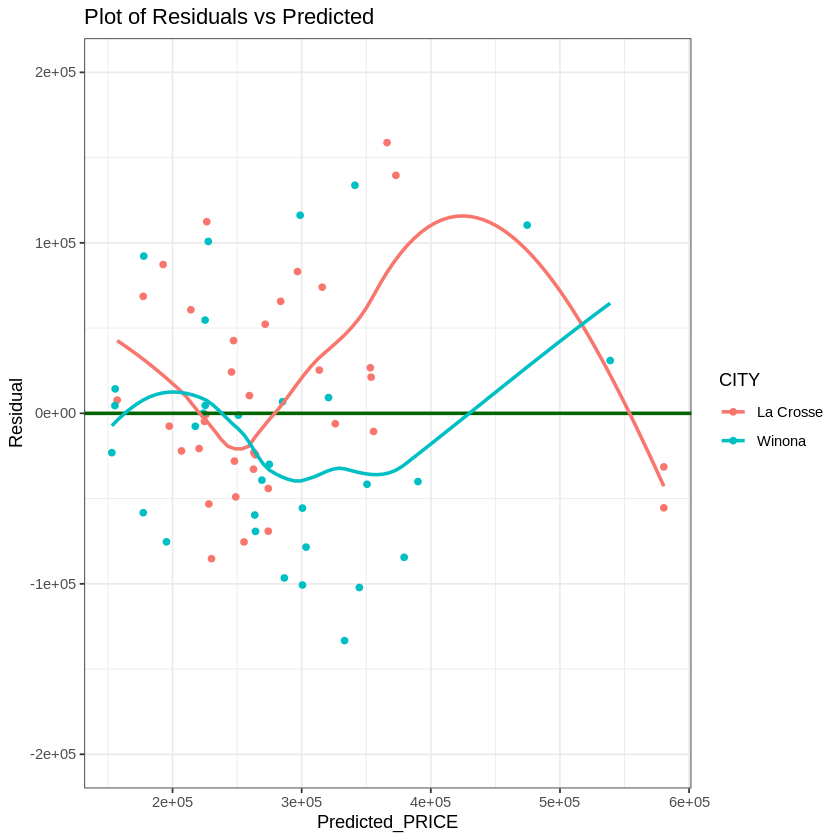

In [148]:
#Scatterplot with simple linear regression line
ggplot(data=LaCrosseWinonaHomePrices_with_Predicted_and_Residuals, aes(x=Predicted_PRICE, y=Residual, col=CITY)) + 
  geom_point() +    #adding the points to the plot
  geom_abline(intercept = 0, slope = 0, color="darkgreen", size=1) +   # adding a y=0 reference line
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  #adding a loess smoother to identify patterns in Residuals
  
  # Make the y-axis symmetric about 0
  ylim(-200000,200000) + 

  ggtitle("Plot of Residuals vs Predicted") +   #Add a title to the plot
  
  theme_bw()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

7.   Does there appear to be any adverse patterns in this plot?  Discuss. 

8.   Redraw the plot above, but use color to identify the two different cities.  Does this predictive model appear to have differences present in the Residuals for the two cities?  Discuss.

<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

## Some Final Considerations



1.  In our modeling the mean home price was allowed to change as a function of Square Foot; however, the variablity was not as a constant variance assumption was made, i.e. $Var(Price | SquareFeet) = \sigma^{2}$.  Is this assumption reasonable?

2.   Identify the homes for which the $Residual$ values are excessively large, e.g. predictions are off by more than $100,000.

3.   Briefly consider a model that includes $City$ as a predictor variable.  The details of this type of model will be covered in detail later in this course.



First, let us consider an investigation around the constant variance assumption.  The following code computes $|Residual|$ and plots these values as a function of Square Feet.

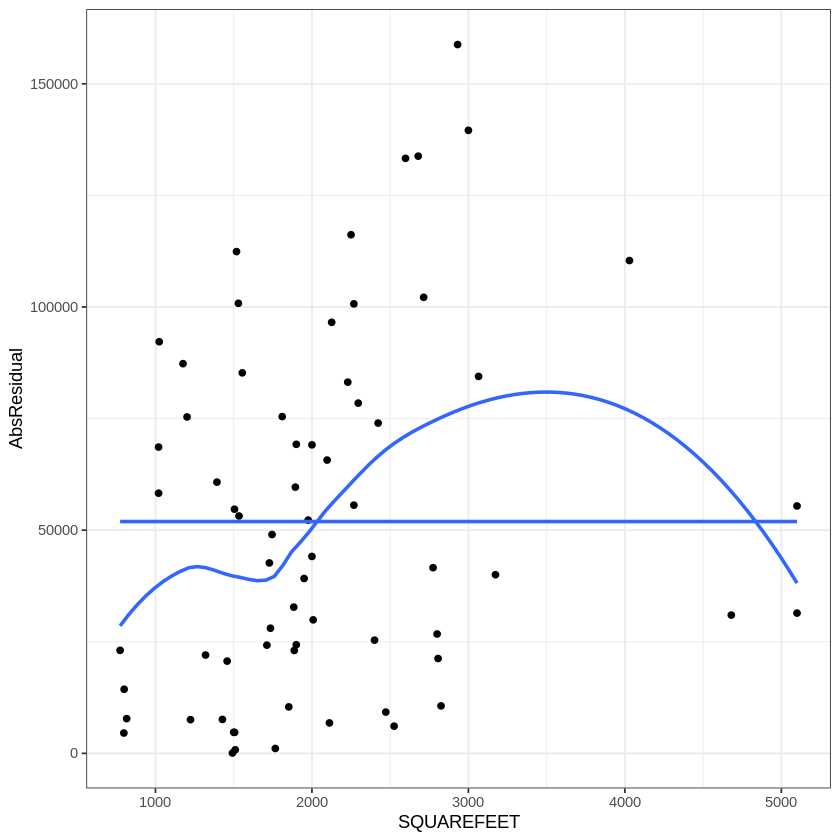

In [161]:
#Computing the |Residual| values and putting these value into a data.frame.
(LaCrosseWinonaHomePrices_with_Predicted
 %>% mutate(
            Residual = (PRICE - Predicted_PRICE),
            AbsResidual = abs(Residual)
           )
) -> LaCrosseWinonaHomePrices_with_Predicted_and_AbsResiduals

#Creating a scatterplot of |Residual| vs Square Feet
ggplot(data=LaCrosseWinonaHomePrices_with_Predicted_and_AbsResiduals, aes(x=SQUAREFEET, y=AbsResidual)) + 
  geom_point() +   
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  #adding a loess smoother to identify patterns in Residuals
  geom_smooth(method='lm', formula = y ~ 1, se=FALSE) +     #add horizontal line at average |Residual| value.
  theme_bw()


Second, conider the following snipit of code that will identify homes for which the predicted home price was off by more than $\$100000$.  Use the URL's provided to investigate potential causes to why these homes were not predicted well by our SLR model.

In [175]:
#Getting homes where the predicted price was substantially over or under estimated
(LaCrosseWinonaHomePrices_with_Predicted_and_AbsResiduals
  %>% filter(AbsResidual > 100000)
  %>% arrange(Residual)
  %>% select(ADDRESS, CITY, STATE, PRICE, Predicted_PRICE, Residual, BEDS, BATHS, SQUAREFEET, LOTSIZE, YEARBUILT, URL)
)

ADDRESS,CITY,STATE,PRICE,Predicted_PRICE,Residual,BEDS,BATHS,SQUAREFEET,LOTSIZE,YEARBUILT,URL
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
362 E 5th St,Winona,MN,199900,333203.3,-133303.3,6,2.0,2598,7013,1870,https://www.redfin.com/MN/Winona/362-E-5th-St-55987/home/55918098
956 Gilmore Ave,Winona,MN,242500,344665.0,-102165.0,6,3.0,2714,6098,1940,https://www.redfin.com/MN/Winona/956-Gilmore-Ave-55987/home/181098089
125 Oskamp Cir,Winona,MN,199900,300596.6,-100696.6,3,1.0,2268,21344,1962,https://www.redfin.com/MN/Winona/125-Oskamp-Cir-55987/home/55920657
168 Janet Marie Ln,Winona,MN,328500,227676.1,100823.9,2,2.0,1530,1860,2005,https://www.redfin.com/MN/Winona/168-Janet-Marie-Ln-55987/home/55916345
1404 Heights Blvd,Winona,MN,585000,474597.7,110402.3,4,4.0,4029,14810,1968,https://www.redfin.com/MN/Winona/1404-Heights-Blvd-55987/home/53187050
3849 Sunnyside Dr W,La Crosse,WI,338900,226490.5,112409.5,2,2.0,1518,15681,2022,https://www.redfin.com/WI/La-Crosse/3849-Sunnyside-Dr-W-54601/home/176139073
21741 Government Pointe Rd,Winona,MN,415000,298818.0,116182.0,3,2.5,2250,239580,1980,https://www.redfin.com/MN/Winona/21741-Government-Pointe-Rd-55987/home/55909113
35901 Old Homer Rd,Winona,MN,475000,341206.7,133793.3,3,3.0,2679,91911,1978,https://www.redfin.com/MN/Winona/35901-Old-Homer-Rd-55987/home/55909269
2629 Lakeshore Dr,La Crosse,WI,512500,372924.1,139575.9,4,2.5,3000,29185,1995,https://www.redfin.com/WI/La-Crosse/2629-Lakeshore-Dr-54603/home/89270268


Lastly, let us consider the effect of adding $City$ as a predictor variable in this linear model.

*  $City$ must have a *factor* data type (instead of a character data type) in order to be included into a linear model
*  An *interaction* term is included here in order to improve the possible performance of this model (again - details regarding this type of model will be forthcoming)

In [182]:
# Need to recode the CITY variable as a factor (instead of a character)
# in order to use this variable in a linear model 
(LaCrosseWinonaHomePrices
   %>% mutate(CITY = factor(CITY))
) -> LaCrosseWinonaHomePrices_RecodedCITY

cat("\n\n Note: CITY is now a <fct> data type.\n\n")
head(LaCrosseWinonaHomePrices_RecodedCITY)

#Fitting the linear regression model with Square Feet and City
LM_Price_SquareFeet_City_SquareFeetCity <- lm(PRICE ~ SQUAREFEET + CITY + SQUAREFEET*CITY, data = LaCrosseWinonaHomePrices)

cat("\n\n Model: Price ~ Square Feet + City + (Square Feet * City)\n\n")
summary(LM_Price_SquareFeet_City_SquareFeetCity)



 Note: CITY is now a <fct> data type.



SALETYPE,SOLDDATE,PROPERTYTYPE,ADDRESS,CITY,STATE,ZIPCODE,PRICE,BEDS,BATHS,⋯,STATUS,NEXTOPENHOUSESTARTTIME,NEXTOPENHOUSEENDTIME,URL,SOURCE,MLSNumber,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
<chr>,<lgl>,<chr>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
MLS Listing,NA,Single Family Residential,2504 Prospect St,La Crosse,WI,54603,224900,3,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/2504-Prospect-St-54603/home/57710601,METROMLS,1811675,N,Y,43.85815,-91.23536
MLS Listing,NA,Single Family Residential,2205 Johnson St,La Crosse,WI,54601,219900,2,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/2205-Johnson-St-54601/home/57970153,METROMLS,1811671,N,Y,43.80073,-91.22238
MLS Listing,NA,Single Family Residential,40633 Lamoille Dr,Winona,MN,55987,294900,3,2.0,⋯,Pre On-Market,NA,NA,https://www.redfin.com/MN/Winona/40633-Lamoille-Dr-55987/home/55910942,NORTHSTARMLS,6260624,N,Y,44.00056,-91.46975
MLS Listing,NA,Single Family Residential,730 Harvey St,La Crosse,WI,54603,339000,3,2.5,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/730-Harvey-St-54603/home/58008728,METROMLS,1811603,N,Y,43.83566,-91.23375
MLS Listing,NA,Single Family Residential,515 Losey Blvd N,La Crosse,WI,54601,379900,3,3.5,⋯,Active,September-25-2022 01:00 PM,September-25-2022 02:30 PM,https://www.redfin.com/WI/La-Crosse/515-Losey-Blvd-N-54601/home/89277469,METROMLS,1811572,N,Y,43.81707,-91.21970
MLS Listing,NA,Single Family Residential,3355 Peace St,La Crosse,WI,54601,274900,3,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/3355-Peace-St-54601/home/89290885,METROMLS,1811563,N,Y,43.76875,-91.20766




 Model: Price ~ Square Feet + City + (Square Feet * City)




Call:
lm(formula = PRICE ~ SQUAREFEET + CITY + SQUAREFEET * CITY, data = LaCrosseWinonaHomePrices)

Residuals:
    Min      1Q  Median      3Q     Max 
-120640  -43909  -13096   35567  148282 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            90692.453  27292.495   3.323  0.00149 ** 
SQUAREFEET                97.552     12.073   8.080 2.58e-11 ***
CITYWinona            -30779.537  40572.672  -0.759  0.45090    
SQUAREFEET:CITYWinona      2.766     17.992   0.154  0.87831    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 65960 on 63 degrees of freedom
Multiple R-squared:  0.6636,	Adjusted R-squared:  0.6476 
F-statistic: 41.42 on 3 and 63 DF,  p-value: 6.566e-15


<u>Outcome</u>: Consider the following outcomes from the LM_Price_SquareFeet_City_SquareFeetCity model.

<ul>
<li>The estimated mean function for each City:</li>
  <ul>
    <li>$\hat{E}(Price | Square Feet, City = LaCrosse) = 90692 + 97.55*Square Feet$</li>
    <li>$\hat{E}(Price | Square Feet, City = Winona) = (90692-30779) + (97.55+2.77)*Square Feet$</li>

  </ul>
<li>$R^2 = 66.4\%$, increased very slightly from $65.1\%$ from our LM_Price_SquareFeet model</li>
<li>$RMSE = \$65,960$, decreased very slightly from $\$66,180$ from our LM_Price_SquareFeet model</li>
</ul>






---



---
End of Document
